<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Axel Jaramillo, Ricardo Damián Hernández Ramírez

**Fecha:** 12 marzo 2024

**Expediente** : 730793,740356
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: [github](https://github.com/jaramillooo/Tarea5_AECabrera)

# Tarea 5: Clase 13

## Descripción de la tarea
# <font color= red>  Tarea  </font>

Implementar todas las técnicas vistas en esta clase al siguiente dataset para predecir el precio de las viviendas:

https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

Código de solución estudiante 1

In [ ]:
# Código de solución estudiante 1
.
.
.
.


Código de solución estudiante 2: Ricardo Damián Hernández Ramírez

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## 1. Modelo CNN univariado

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

In [5]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [6]:
column = 'price'
n_steps = 3
X, y = split_univariate_sequence(data[column], n_steps)
# Número de características de mis datos
n_features = 1

In [7]:
model_1 = Sequential()
model_1.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model_1.add(MaxPooling1D())
model_1.add(Flatten())
model_1.add(Dense(50, activation='relu'))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mse')
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,493
Trainable params: 3,493
Non-trainable params: 0
______________________________________________________

In [8]:
X.shape


(542, 3)

In [9]:
X = X.reshape((X.shape[0], X.shape[1], n_features))
X

array([[[13300000],
        [12250000],
        [12250000]],

       [[12250000],
        [12250000],
        [12215000]],

       [[12250000],
        [12215000],
        [11410000]],

       ...,

       [[ 1855000],
        [ 1820000],
        [ 1767150]],

       [[ 1820000],
        [ 1767150],
        [ 1750000]],

       [[ 1767150],
        [ 1750000],
        [ 1750000]]], dtype=int64)

In [10]:
history_1 = model_1.fit(X,y, epochs = 1000, verbose = False)

<AxesSubplot:>

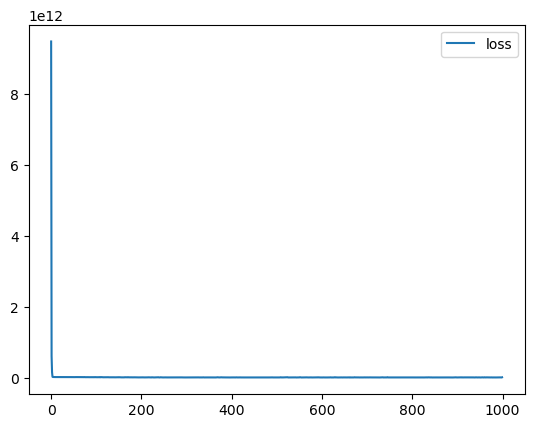

In [11]:
pd.DataFrame(history_1.history).plot()


In [12]:
x_input = np.array(data['price'][-3:])  

# Luego remodelamos para que coincida con la forma de entrada del modelo
x_input = np.reshape(x_input, (1, x_input.shape[0], 1))  

# Finalmente, predecimos utilizando el modelo
yhat = model_1.predict(x_input, verbose=0)
yhat

array([[1737818.5]], dtype=float32)


2. Modelos CNN multivariados

2.1 Series de entradas múltiples

In [13]:
cat = data.select_dtypes(exclude='int')  # Seleccionar las columnas categóricas
dummy = pd.get_dummies(data[cat.columns], drop_first=True)  # Obtener las variables dummy
dummy = dummy.astype('int')  # Convertir las variables dummy a tipo entero
data_without_cat = data.drop(columns=cat.columns)

# Concatenar data original sin las columnas categóricas y las variables dummy
data_dummy = pd.concat([data_without_cat, dummy], axis=1)
# Mover la columna price a
price_column = data_dummy.pop('price')
data_dummy['price'] = price_column


In [14]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence(sequence: np.ndarray, n_steps: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [15]:
n_steps = 3
X, y = split_multivariate_sequence(data_dummy.to_numpy(), n_steps)

n_features = X.shape[2]

X.shape, y.shape

((543, 3, 13), (543,))

In [16]:
# Definimos nuestro modelo
model_2 = Sequential()
model_2.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model_2.add(MaxPooling1D())
model_2.add(Flatten())
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(1))
model_2.compile(optimizer='adam', loss='mse')
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 2, 64)             1728      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                3250      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,029
Trainable params: 5,029
Non-trainable params: 0
____________________________________________________

In [17]:
history_2 = model_2.fit(X,y, epochs = 1000, verbose = False)

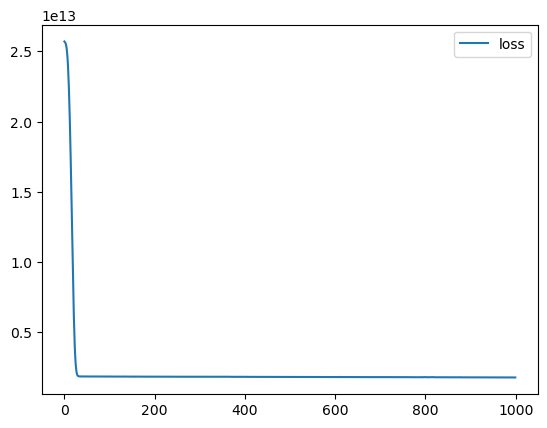

In [18]:
pd.DataFrame(history_2.history).plot()
plt.show()

In [19]:
last_three_samples = X[-3:][0]
input_array = last_three_samples
input_array_reshaped = input_array.reshape((1, n_steps, n_features))
predicted_y = model_2.predict(input_array_reshaped, verbose=0)
predicted_y

array([[2512002.8]], dtype=float32)

## Modelo CNN con múltiples encabezamientos

In [20]:
# Paqueterías faltantes
from keras.models import Model
from keras.layers import concatenate, Input
from keras.utils import plot_model

In [21]:
n_features = 1
n_steps = 3

In [22]:
# Primer modelo de entrada
visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(64, 2, activation='relu')(visible1)
cnn1 = MaxPooling1D()(cnn1)
cnn1 = Flatten()(cnn1)

In [23]:
# Segundo modelo de entrada
visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(64, 2, activation='relu')(visible2)
cnn2 = MaxPooling1D()(cnn2)
cnn2 = Flatten()(cnn2)

In [24]:
# merge modelos de entrada
merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)

In [25]:
# Conectar entradas y salida del modelo
model_3 = Model(inputs=[visible1, visible2], outputs=output)

model_3.compile(optimizer='adam', loss='mse')

model_3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 1)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3, 1)]       0           []                               
                                                                                                  
 conv1d_2 (Conv1D)              (None, 2, 64)        192         ['input_1[0][0]']                
                                                                                                  
 conv1d_3 (Conv1D)              (None, 2, 64)        192         ['input_2[0][0]']                
                                                                                              

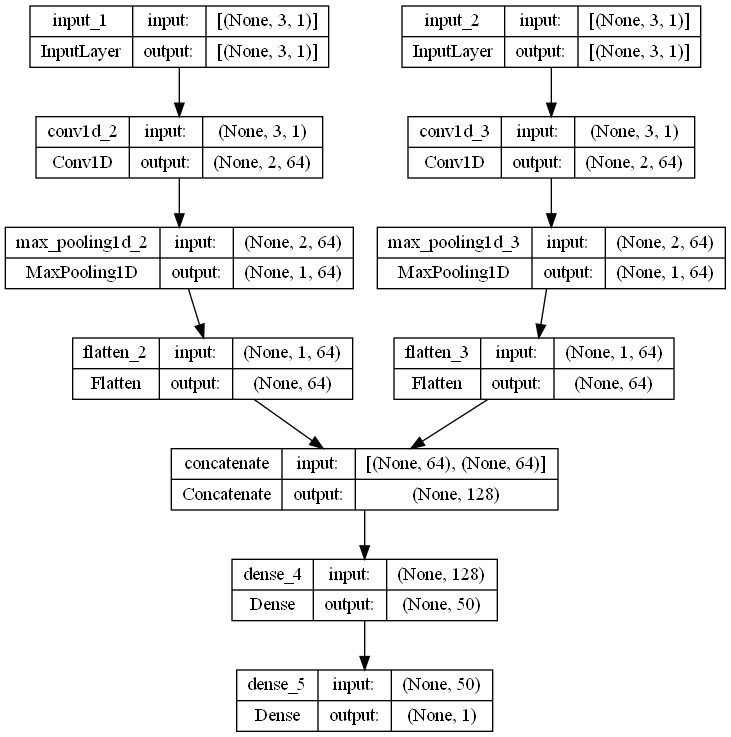

In [26]:
plot_model(model_3, to_file='model.png', show_shapes=True, show_layer_names=True)


In [27]:
X[0].shape

(3, 13)

In [28]:
# Una serie de tiempo por submodelo
n_features = 1

# Separar datos de entrada
X1 = X[:, :, 0].reshape(X.shape[0], X.shape[1], n_features)
X2 = X[:, :, 1].reshape(X.shape[0], X.shape[1], n_features)

In [29]:
X1.shape


(543, 3, 1)

In [30]:
history_3 = model_3.fit([X1, X2], y, epochs=1000, verbose=0)

<AxesSubplot:>

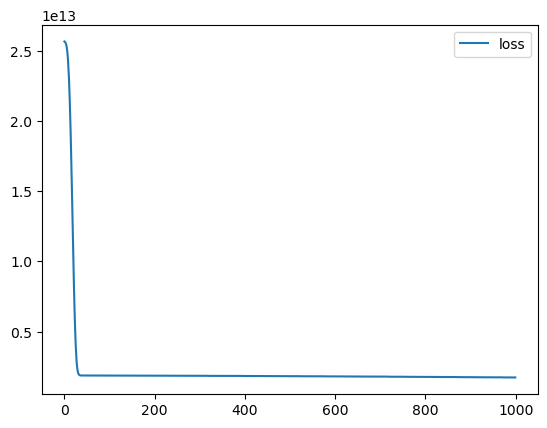

In [31]:
pd.DataFrame(history_3.history).plot()


In [32]:
x1 = X1[-3:][0].reshape((1, n_steps, n_features))
x2 = X2[-3:][0].reshape((1, n_steps, n_features))
yhat = model_3.predict([x1, x2], verbose=0)
yhat

array([[2675623.]], dtype=float32)

## 2.2 Múltiples series paralelas (multivariable forecasting)

In [33]:
# dividir una secuencia multivariada en muestras para predicción múltiple
def split_multiple_forecasting_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [34]:
n_steps = 3
X_m, y_m = split_multiple_forecasting_sequence(data_dummy.to_numpy(), n_steps=n_steps)


In [35]:
n_features  = X_m.shape[2]
# define model_4
model_4 = Sequential()
model_4.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model_4.add(MaxPooling1D())
model_4.add(Flatten())
model_4.add(Dense(55, activation='relu'))
model_4.add(Dense(n_features))
model_4.compile(optimizer='adam', loss='mse')

model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 2, 64)             1856      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 55)                3575      
                                                                 
 dense_7 (Dense)             (None, 14)                784       
                                                                 
Total params: 6,215
Trainable params: 6,215
Non-trainable params: 0
____________________________________________________

In [36]:
history_4 = model_4.fit(X_m, y_m, epochs=1000, verbose=0)


<AxesSubplot:>

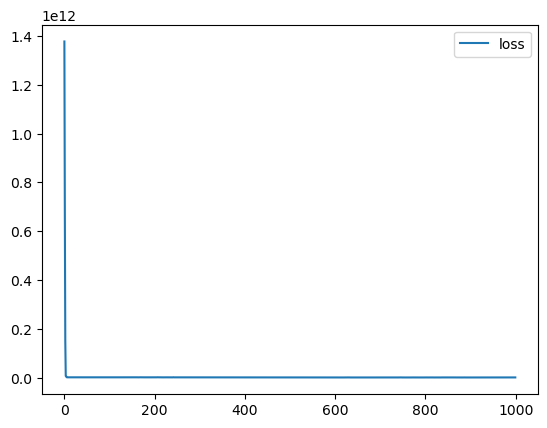

In [37]:
pd.DataFrame(history_4.history).plot()


In [38]:
x_input  = X_m[-1].reshape((1, n_steps, n_features))
yhat = model_4.predict(x_input, verbose=0)
print(yhat)


[[ 1.9868502e+03 -1.0895583e+03 -1.1268074e+03  1.9135292e+03
   5.8478308e+02 -3.2797470e+02  5.9982233e+02  9.5722984e+01
  -8.2967419e+02  2.4550841e+02 -8.6280060e+02  1.6659569e+02
   3.7081112e+01  1.7068654e+06]]


## Multi-output CNN Model

In [39]:
n_features = X_m.shape[2]

visible = Input(shape=(n_steps, n_features))
cnn = Conv1D(64, 2, activation='relu')(visible)
cnn = MaxPooling1D()(cnn)
cnn = Flatten()(cnn)
cnn = Dense(50, activation='relu')(cnn)

In [40]:
# Definimos salida 1
output1 = Dense(1)(cnn)
# Definimos salida 2
output2 = Dense(1)(cnn)
# Definimos salida 3
output3 = Dense(1)(cnn)

In [41]:
# Ponemos todo junto
model_5 = Model(inputs=visible, outputs=[output1, output2, output3])
model_5.compile(optimizer='adam', loss='mse')

In [42]:
model_5.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 3, 14)]      0           []                               
                                                                                                  
 conv1d_5 (Conv1D)              (None, 2, 64)        1856        ['input_3[0][0]']                
                                                                                                  
 max_pooling1d_5 (MaxPooling1D)  (None, 1, 64)       0           ['conv1d_5[0][0]']               
                                                                                                  
 flatten_5 (Flatten)            (None, 64)           0           ['max_pooling1d_5[0][0]']        
                                                                                            

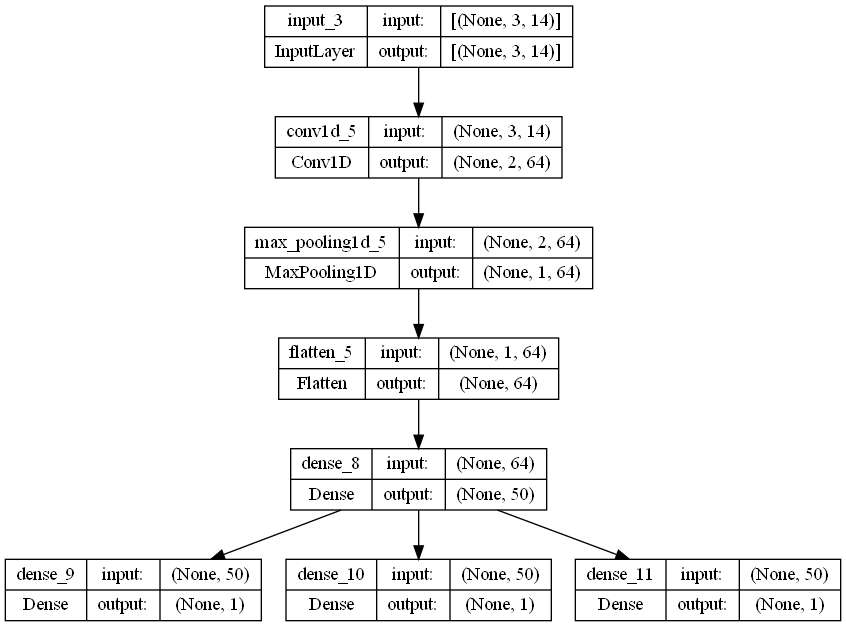

In [43]:
plot_model(model_5, show_shapes=True, show_layer_names=True)


In [44]:
y_m.shape

(542, 14)

In [45]:
# Separar salidas
y1 = y_m[:, 0].reshape((y_m.shape[0], 1))
y2 = y_m[:, 1].reshape((y_m.shape[0], 1))
y3 = y_m[:, 2].reshape((y_m.shape[0], 1))

In [46]:
y1.shape


(542, 1)

In [48]:
history_5 = model_5.fit(X_m, [y1,y2,y3], epochs=700, verbose=0)


<AxesSubplot:>

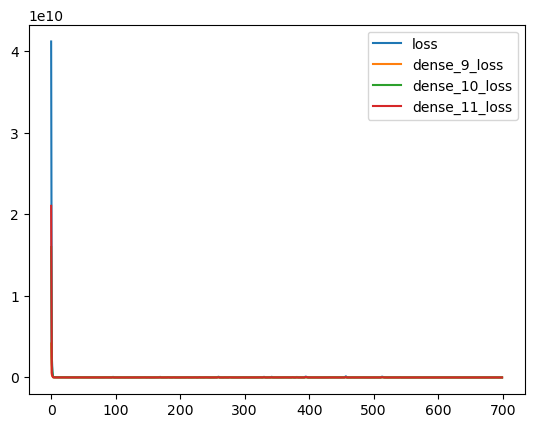

In [49]:
pd.DataFrame(history_5.history).plot()


## 3. Modelos CNN de pasos múltiples
3.1 Serie temporal univariada

In [50]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence_m_step(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [51]:
n_steps_in, n_steps_out  = 3, 2
# Particionar mis datos
X, y = split_univariate_sequence_m_step(data['price'], n_steps_in, n_steps_out)
X.shape, y.shape


((541, 3), (541, 2))

In [52]:
# Debemos tranformar nuestro datos de [samples, timesteps] a [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(541, 3, 1)

In [53]:
# Crear nuestro modelo
model_6 = Sequential()
model_6.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_6.add(MaxPooling1D())
model_6.add(Flatten())
model_6.add(Dense(50, activation='relu'))
model_6.add(Dense(n_steps_out))
model_6.compile(optimizer='adam', loss='mse')

model_6.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 2, 64)             192       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 50)                3250      
                                                                 
 dense_13 (Dense)            (None, 2)                 102       
                                                                 
Total params: 3,544
Trainable params: 3,544
Non-trainable params: 0
____________________________________________________

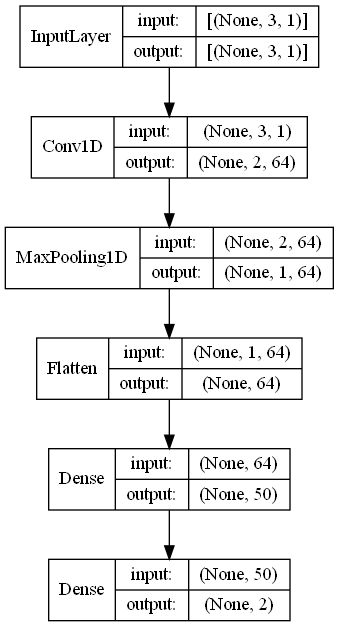

In [54]:
plot_model(model_6, show_layer_names=False, show_shapes=True,)


In [55]:
history_6 = model_6.fit(X, y, epochs=1000, verbose=0)


<AxesSubplot:>

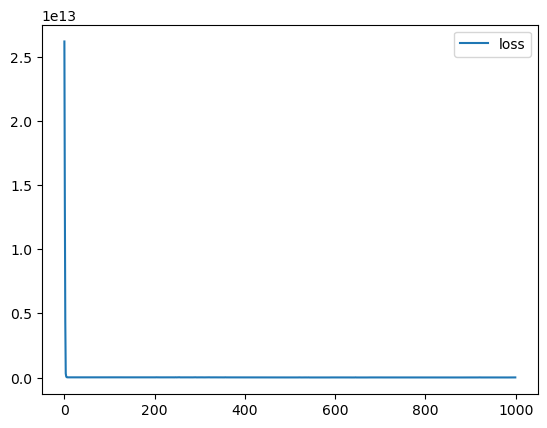

In [56]:
pd.DataFrame(history_6.history).plot()


In [58]:
last_sample = X[-1]

# Reshape para que tenga la forma correcta (1, n_steps, n_features)
x_input  = last_sample.reshape((1, n_steps, n_features))

# Hacer la predicción
yhat = model_6.predict(x_input, verbose=0)

# Imprimir las predicciones
print(yhat)

[[1716790.1 1693809.8]]


## 3.2 Serie temporal multivariada

In [59]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence_m_step(sequence: np.ndarray, n_steps_in: int, n_steps_out: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1

        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [60]:
# Elegir un número de pasos de tiempo
n_steps_in, n_steps_out = 3, 2

X, y = split_multivariate_sequence_m_step(data_dummy.to_numpy(), n_steps_in, n_steps_out)

In [61]:
n_features = X.shape[2]

# Definir el modelo 
model_7 = Sequential()
model_7.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_7.add(MaxPooling1D())
model_7.add(Flatten())
model_7.add(Dense(50, activation='relu'))
model_7.add(Dense(n_steps_out))
model_7.compile(optimizer='adam', loss='mse')
# fit model_7
model_7.fit(X, y, epochs=2000, verbose=0)

model_7.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 2, 64)             1728      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 50)                3250      
                                                                 
 dense_15 (Dense)            (None, 2)                 102       
                                                                 
Total params: 5,080
Trainable params: 5,080
Non-trainable params: 0
____________________________________________________

In [63]:
last_sample = X[-1]

# Reshape para que tenga la forma correcta (1, n_steps, n_features)
x_input  = last_sample.reshape((1, n_steps, n_features))

# Hacer la predicción
yhat = model_7.predict(x_input, verbose=0)

# Imprimir las predicciones
print(yhat)

[[2688742. 2676333.]]


## 3.3 Serie temporal multivariada predicción múltiple de cada entrada

In [64]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence_m_step_parallel(sequence: np.ndarray, n_steps_in: int, n_steps_out: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [65]:
# Elegir un número de pasos de tiempo
n_steps_in, n_steps_out = 3, 2

X, y = split_multivariate_sequence_m_step_parallel(data_dummy.to_numpy(), n_steps_in, n_steps_out)
X.shape ,y.shape

((541, 3, 14), (541, 2, 14))

In [66]:
# flatten output
n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))
y.shape

(541, 28)

In [67]:
n_features = X.shape[2]

# Definimos nuestro modelo
model_8 = Sequential()
model_8.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_8.add(MaxPooling1D())
model_8.add(Flatten())
model_8.add(Dense(50, activation='relu'))
model_8.add(Dense(n_output))
model_8.compile(optimizer='adam', loss='mse')

# fit model_8
history_8 = model_8.fit(X, y, epochs=1000, verbose=0)

<AxesSubplot:>

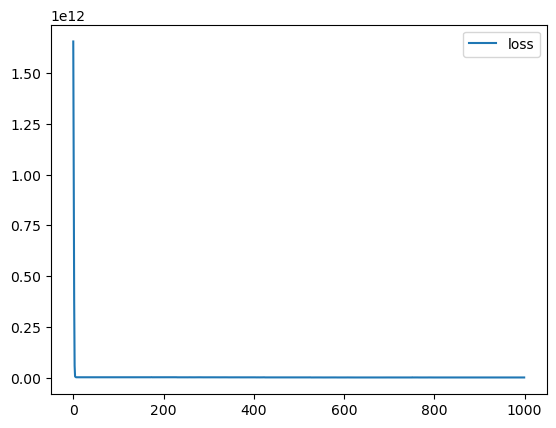

In [68]:
pd.DataFrame(history_8.history).plot()


In [70]:
# Probar nuestro model
x_input  = X[-1].reshape((1, n_steps_in, n_features))
yhat  = model_8.predict(x_input, verbose=0)
print(yhat)0
 

[[-4.11697906e+02  8.06619019e+02  7.36855927e+01  2.80964569e+02
  -1.28580612e+02 -2.72858246e+02  8.71842896e+02 -4.12799469e+02
   3.66671570e+02  7.75470032e+02 -6.48885010e+02  9.35972717e+02
  -2.94272400e+02  1.75800400e+06  6.61780029e+02 -6.95239319e+02
  -3.47835114e+02 -2.00328140e+02 -1.60911224e+02 -1.00933984e+03
   1.02243329e+03  1.46533630e+02  1.07750354e+03  9.09695007e+02
   4.75477264e+02 -7.56143860e+02 -1.83123398e+01  1.74573825e+06]]


In [71]:
[yhat[i].reshape(n_steps_out, n_features) for i in range(yhat.shape[0])]


[array([[-4.11697906e+02,  8.06619019e+02,  7.36855927e+01,
          2.80964569e+02, -1.28580612e+02, -2.72858246e+02,
          8.71842896e+02, -4.12799469e+02,  3.66671570e+02,
          7.75470032e+02, -6.48885010e+02,  9.35972717e+02,
         -2.94272400e+02,  1.75800400e+06],
        [ 6.61780029e+02, -6.95239319e+02, -3.47835114e+02,
         -2.00328140e+02, -1.60911224e+02, -1.00933984e+03,
          1.02243329e+03,  1.46533630e+02,  1.07750354e+03,
          9.09695007e+02,  4.75477264e+02, -7.56143860e+02,
         -1.83123398e+01,  1.74573825e+06]], dtype=float32)]